#### Instructions to solve this assignment:

1. Read the Dataset "insurance.csv".
2. Identify numeric and categorical variables from dataset.
3. Calculate the percentage of missing values from each columns.
4. Drop the column for which the percentage of missing values is more than 25%
5. Impute the missing values for numeric variables with their mean values (if missing value percentage is less than 25%).
6. Impute the missing values for categorical variables with their mode values (if missing value percentage is less than 25%).
7. Choose relevant plots for variables and do plotting for each variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('../insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,0.0,no,southwest,2007.94500


In [84]:
df.isnull().sum()

age          0
sex          3
bmi         40
children    23
smoker      18
region      17
charges     18
dtype: int64

In [81]:
df.shape

(1338, 7)

In [85]:
(df.isnull().sum()/df.shape[0])*100

age         0.000000
sex         0.224215
bmi         2.989537
children    1.718984
smoker      1.345291
region      1.270553
charges     1.345291
dtype: float64

In [ ]:
#No column data has more than 25% missing value hence, not dropping anything

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1298 non-null   float64
 3   children  1315 non-null   float64
 4   smoker    1320 non-null   object 
 5   region    1321 non-null   object 
 6   charges   1320 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [101]:
df.loc[df['children'].isnull(), 'children'] = df['children'].mean()
df.loc[df['bmi'].isnull(), 'bmi'] = df['bmi'].mean()
df.loc[df['smoker'].isnull(), 'smoker'] = df['smoker'].mode()[0]
df.loc[df['sex'].isnull(), 'sex'] = df['sex'].mode()[0]
df.loc[df['region'].isnull(), 'region'] = df['region'].mode()[0]
df.loc[df['charges'].isnull(), 'charges'] = df['charges'].mean()

In [102]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [103]:
#Converted children column as int

df['children'] = df['children'].astype('int')

In [104]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


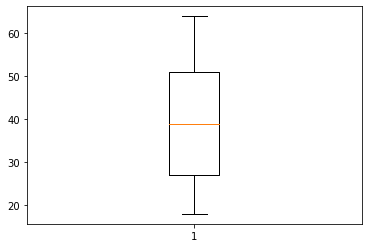

In [105]:
plt.boxplot(x = df['age'])
plt.show()

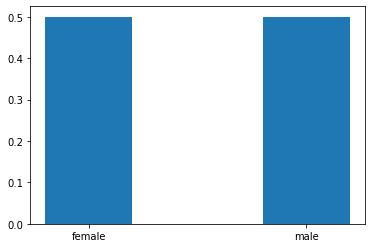

In [106]:
plt.bar(x = df['sex'], height = 0.5, width = 0.4)
plt.show()

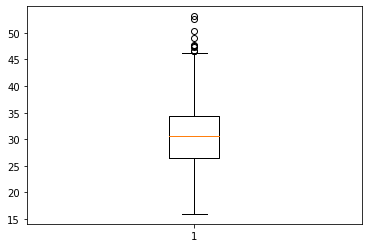

In [107]:
plt.boxplot(x = df['bmi'])
plt.show()

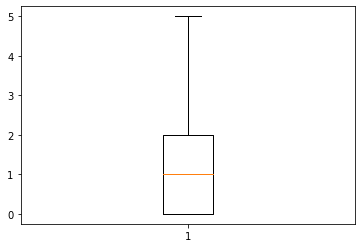

In [108]:
plt.boxplot(x = df['children'])
plt.show()

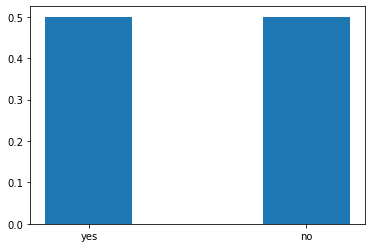

In [109]:
plt.bar(x = df['smoker'], height = 0.5, width = 0.4)
plt.show()

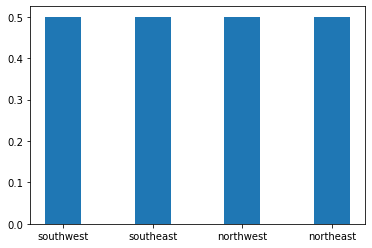

In [99]:
plt.bar(x = df['region'], height = 0.5, width = 0.4)
plt.show()

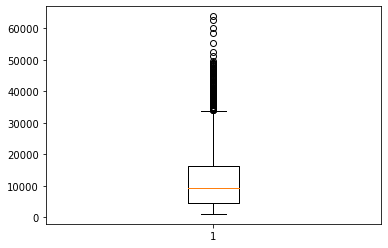

In [110]:
plt.boxplot(x = df['charges'])
plt.show()

In [ ]:
# Tried few other types of plotting

Text(0.5, 1.0, 'Region vs BMI')

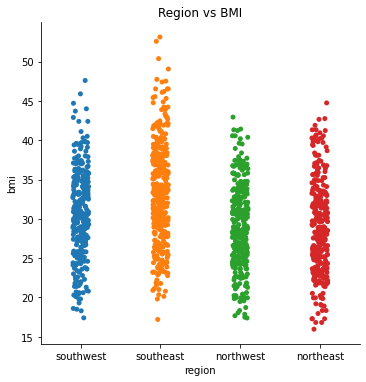

In [111]:
sns.catplot(x = 'region', y = 'bmi', data = df)
plt.title('Region vs BMI')

Text(0.5, 1.0, 'Region vs Charges')

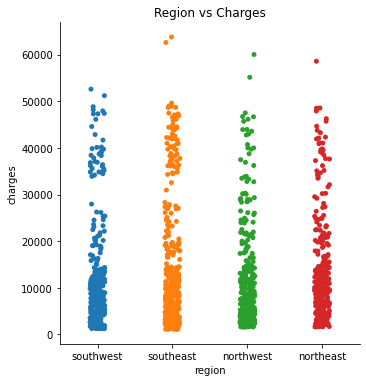

In [112]:
sns.catplot(x = 'region', y = 'charges', data = df)
plt.title('Region vs Charges')

Text(0.5, 1.0, 'Age vs Charges wrt Smoking Habits for Senior Citizens')

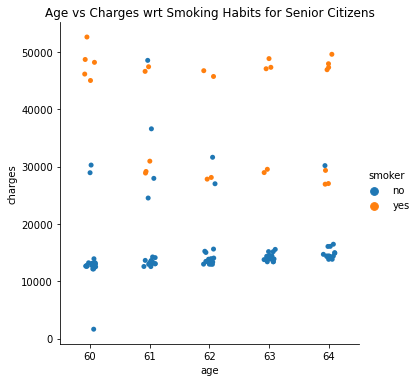

In [132]:
senior_citizen = df.loc[df['age'] >= 60]

sns.catplot(x = 'age', y = 'charges', hue = 'smoker', data = senior_citizen)
plt.title('Age vs Charges wrt Smoking Habits for Senior Citizens')

Text(0.5, 1.0, 'Age vs Charges wrt Smoking Habits: Box-Plot  For Senior Citizens')

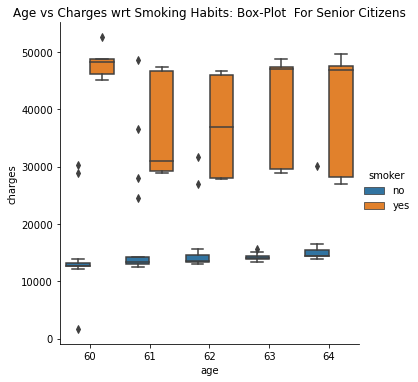

In [131]:
sns.catplot(x = 'age', y = 'charges', hue = 'smoker', data = senior_citizen, kind = 'box')
plt.title('Age vs Charges wrt Smoking Habits: Box-Plot  For Senior Citizens')

Text(0.5, 1.0, 'Age vs BMI for Senior Citizens')

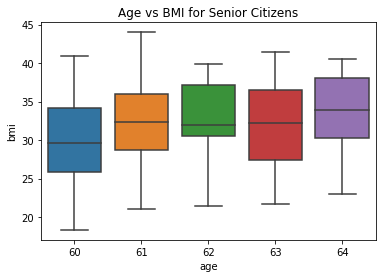

In [133]:
sns.boxplot(x = 'age', y = 'bmi', data = senior_citizen)
plt.title('Age vs BMI for Senior Citizens')

Text(0.5, 1.0, 'BMI vs Charges')

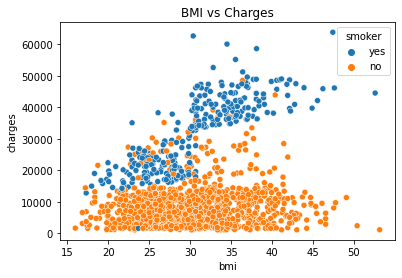

In [113]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)
plt.title('BMI vs Charges')

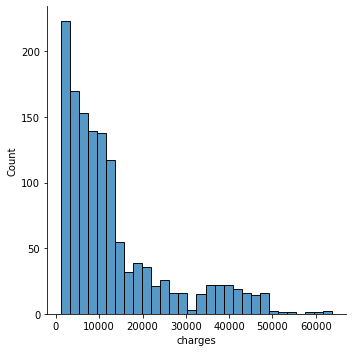

In [156]:
sns.displot(df['charges'])

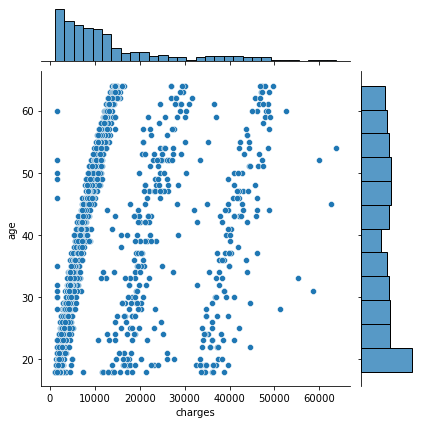

In [145]:
sns.jointplot(x = 'charges', y = 'age', data = df)

Text(0.5, 1.0, 'Age vs BMI')

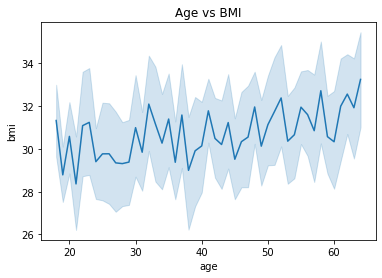

In [162]:
sns.lineplot(x = 'age', y = 'bmi', data = df)
plt.title('Age vs BMI')